PROJECT 3: Logistic Regression
HONORE NGUESSAN

December 8, 2019

INTRODUCTION

The dataset, which is from http://biostat.mc.vanderbilt.edu/wiki/Main/DataSets, contains 1309 observation and 14 variables about one of the most sad shipwrecks in history that occured on April 15, 1912: Titanic. Lets describe whats the meaning of the features given the dataset. Variable Definition Key is:

Survival
        0= No
        1= Yes

pclass (Ticket class)
        1=1st
        2=2nd
        3=3rd

sex

age

sibsp (# of siblings / spouses aboard the Titanic)
  
parch (# of parents / children aboard the Titanic)
  
tickets
 
fare

cabin

embarked Port of Embarkation.
        C = Cherbourg,
        Q = Queenstown,
        S = Southampton
        
pclass: A proxy for socio-economic status (SES)
         1st = Upper
         2nd = Middle
         3rd = Lower

    
   In fact, After analyzing the dataset for the project 1, I found that many passsengers have been survived. In this project, I was wondering how to make a great logistic regression model to predict whether a passenger on the titanic would have been survived or not.


# 1- Collecting the Data

The very first step for implementing the logistic regression is to collect the data. We will load the csv file containing the data-set into the programs using the pandas.

In [144]:
# Importing libraires
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

In [145]:
# Read the .CVS file
df=pd.read_csv('titanic3.csv')
print(df)

      pclass  survived                                               name  \
0          1         1                      Allen, Miss. Elisabeth Walton   
1          1         1                     Allison, Master. Hudson Trevor   
2          1         0                       Allison, Miss. Helen Loraine   
3          1         0               Allison, Mr. Hudson Joshua Creighton   
4          1         0    Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
5          1         1                                Anderson, Mr. Harry   
6          1         1                  Andrews, Miss. Kornelia Theodosia   
7          1         0                             Andrews, Mr. Thomas Jr   
8          1         1      Appleton, Mrs. Edward Dale (Charlotte Lamson)   
9          1         0                            Artagaveytia, Mr. Ramon   
10         1         0                             Astor, Col. John Jacob   
11         1         1  Astor, Mrs. John Jacob (Madeleine Talmadge Force)   

The dataset has 1309 observations and 14 variables.

# 2- Look at the data

In [203]:
# dimensions of the dataframe
df.shape

(1309, 14)

In [147]:
# type of the data
df.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [148]:
# structure of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


There are four type of variables:

Numerical Features: Age, Fare, SibSp and Parch

Categorical Features: Sex, Embarked, Survived and Pclass

Alphanumeric Features: Ticket and Cabin(Contains both alphabets and the numeric value)

Text Features: Name


In [149]:
# Look at the top values
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [150]:
# Look at the bottom values
df.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [151]:
# 
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


 Overall, by looking up the data, there are missing values in features such as age, cabin, boatlife..ect.

# 3- Cleaning Data

The the target variable is whether or not the passenger survived. The data-set is goind to be modified according to the target variable. We will eliminate all the null values and the colomns we do not need in the DataFrame.

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64
********************


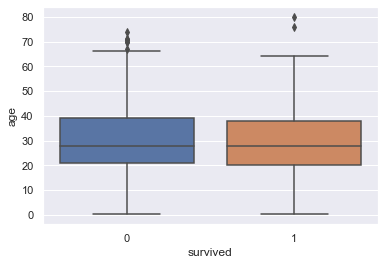

In [152]:
# Summary of the missing values
print (df.isnull().sum())
print (''.center(20, "*"))
sns.boxplot(x='survived',y='age',data=df)

In [153]:
#let's start off by dropping the coulmns we will not be needing
df2 = df.drop(["name","ticket","cabin","boat","body","home.dest"], axis=1)

In [154]:
# Remove Rows With Missing Values
df2.dropna(inplace=True)

In [155]:
# Transforming sex
df2['sex'] = df.sex.apply(lambda x: 0 if x == "female" else 1)

In [156]:
# Transforming embarked     
origin = {"S": 0, "C": 1, "Q": 2}
data = [df2]

for dataset in data:
    dataset['embarked'] = dataset['embarked'].map(origin)

In [157]:
# Check if No Missing Values
df2["age"].isnull().sum()
df2["fare"].isnull().sum()
df2["embarked"].isnull().sum()

0

In [158]:
# Summarizing features 
df2.describe()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
count,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000
mean,2.209012,0.407478,0.629914,29.813202,0.504314,0.421860,36.603024,0.299137
std,0.840685,0.491601,0.483059,14.366254,0.913080,0.840655,55.753648,0.553014
min,1.000000,0.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,21.000000,0.000000,0.000000,8.050000,0.000000
50%,2.000000,0.000000,1.000000,28.000000,0.000000,0.000000,15.750000,0.000000
75%,3.000000,1.000000,1.000000,39.000000,1.000000,1.000000,35.077100,1.000000
max,3.000000,1.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [159]:
# dimensions
df2.shape

(1043, 8)

In [160]:
# structure of the dataframe
df2.info()
print(df2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1043 entries, 0 to 1308
Data columns (total 8 columns):
pclass      1043 non-null int64
survived    1043 non-null int64
sex         1043 non-null int64
age         1043 non-null float64
sibsp       1043 non-null int64
parch       1043 non-null int64
fare        1043 non-null float64
embarked    1043 non-null int64
dtypes: float64(2), int64(6)
memory usage: 73.3 KB
      pclass  survived  sex    age  sibsp  parch      fare  embarked
0          1         1    0  29.00      0      0  211.3375         0
1          1         1    1   0.92      1      2  151.5500         0
2          1         0    0   2.00      1      2  151.5500         0
3          1         0    1  30.00      1      2  151.5500         0
4          1         0    0  25.00      1      2  151.5500         0
5          1         1    1  48.00      0      0   26.5500         0
6          1         1    0  63.00      1      0   77.9583         0
7          1         0    1  39

# 4- Exploratory Data Analysis 

The data-set is analyzed to determine the relationship between the variables. By creating different plots to check the relationship between the variables.We are going to use EDA principles and the Matplotlib / Seaborn packages to visualize the data. 

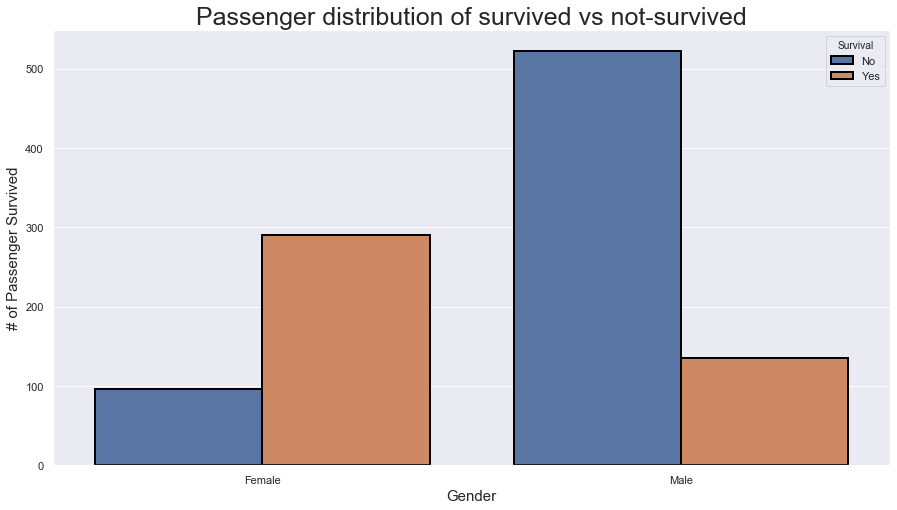

In [161]:
sns.set(style='darkgrid')
plt.subplots(figsize = (15,8))
ax=sns.countplot(x='sex',data=df2,hue='survived',edgecolor=(0,0,0),linewidth=2)
df2.shape
## Fixing title, xlabel and ylabel
plt.title('Passenger distribution of survived vs not-survived',fontsize=25)
plt.xlabel('Gender',fontsize=15)
plt.ylabel("# of Passenger Survived", fontsize = 15)
labels = ['Female', 'Male']
#Fixing xticks.
plt.xticks(sorted(df2.survived.unique()),labels)
## Fixing legends
leg = ax.get_legend()
leg.set_title('Survival')
legs=leg.texts
legs[0].set_text('No')
legs[1].set_text('Yes')

([<matplotlib.axis.XTick at 0x1bddfc2d0b8>,
 <a list of 3 Text xticklabel objects>)

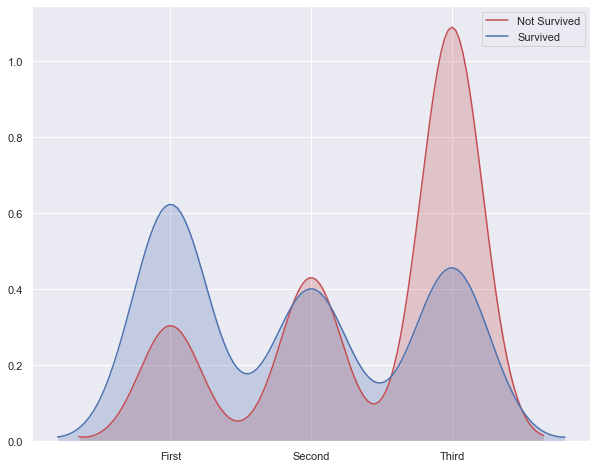

In [162]:
plt.subplots(figsize=(10,8))
sns.kdeplot(df2.loc[(df2['survived'] == 0),'pclass'],shade=True,color='r',label='Not Survived')
ax=sns.kdeplot(df2.loc[(df2['survived'] == 1),'pclass'],shade=True,color='b',label='Survived' )

labels = ['First', 'Second', 'Third']
plt.xticks(sorted(df2.pclass.unique()),labels)

Text(0.5, 0, 'Fare')

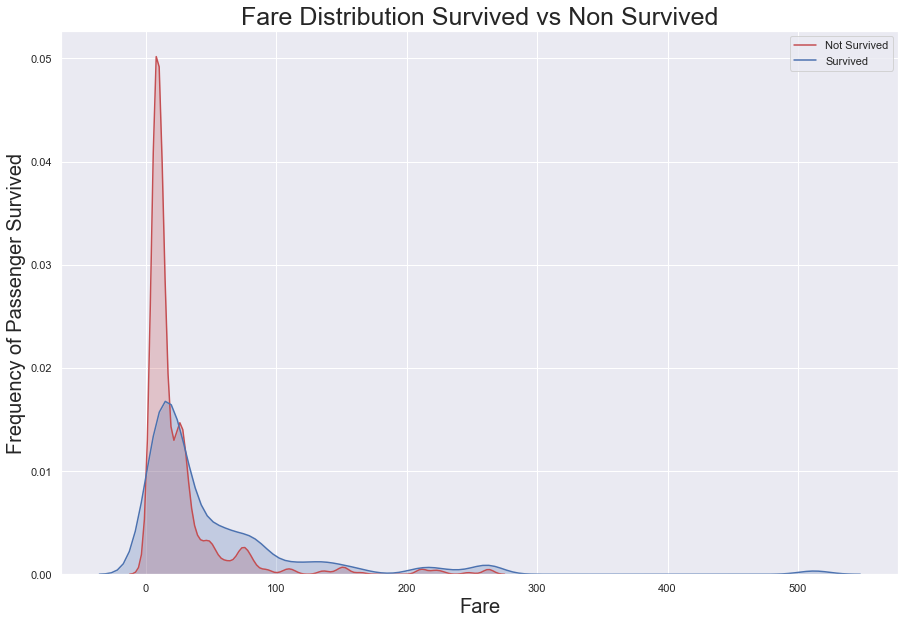

In [163]:
plt.subplots(figsize=(15,10))

ax=sns.kdeplot(df2.loc[(df2['survived'] == 0),'fare'],color='r',shade=True,label='Not Survived')
ax=sns.kdeplot(df2.loc[(df2['survived'] == 1),'fare'],color='b',shade=True,label='Survived' )
plt.title('Fare Distribution Survived vs Non Survived',fontsize=25)
plt.ylabel('Frequency of Passenger Survived',fontsize=20)
plt.xlabel('Fare',fontsize=20)

# 5- Logistic Regression

In [164]:
# Converting fare from float to int64. 

data = [df2]

for dataset in data:
    dataset['fare'] = dataset['fare'].fillna(0)
    dataset['fare'] = dataset['fare'].astype(int)

In [165]:
# Converting age from float to int64. 

data = [df2]

for dataset in data:
    dataset['age'] = dataset['age'].fillna(0)
    dataset['age'] = dataset['age'].astype(int)

In [166]:
# Look at a general structure of numeric converted data
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1043 entries, 0 to 1308
Data columns (total 8 columns):
pclass      1043 non-null int64
survived    1043 non-null int64
sex         1043 non-null int64
age         1043 non-null int32
sibsp       1043 non-null int64
parch       1043 non-null int64
fare        1043 non-null int32
embarked    1043 non-null int64
dtypes: int32(2), int64(6)
memory usage: 105.2 KB


In [167]:
# look at the top of the dat
df2.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,0,29,0,0,211,0
1,1,1,1,0,1,2,151,0
2,1,0,0,2,1,2,151,0
3,1,0,1,30,1,2,151,0
4,1,0,0,25,1,2,151,0


A this step, for the performance of the model the data, we are going to split it into the test data and train data. The data is split using the train_test_split. The data here is split in the ratio 70:30.

In [179]:
# all features in X and the target variable in Y
X = df2.drop("survived",axis=1)
y = df2["survived"]

In [180]:
# training 70%, testing 30%, and spliting the chosen data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=101)

In [181]:
# Logistic Regression to train the model.
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\BETTY KOUADIO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Now, for the model prediction the logistic regression function is implemented by importing the logistic regression model in the sklearn module.

# Use appropriate metric and interpret the meaning of the score

In [182]:
# Check the accuracy of the model for predictions.
predictions = logmodel.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

Accuracy: 0.805111821086262
Precision: 0.8303571428571429
Recall: 0.6888888888888889
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       178
           1       0.83      0.69      0.75       135

    accuracy                           0.81       313
   macro avg       0.81      0.79      0.80       313
weighted avg       0.81      0.81      0.80       313



The classification report displays the Precision, Recall , F1  and Support scores for the model.

Precision score means the the level up-to which the prediction made by the model is precise. The precision for Non survided is 0.79 and for survided is 0.83 due to the low false positive rate.

Accuracy: 0.80 relatively high.

Recall is the amount up-to which the model can predict the outcome. Recall for Non survided is 0.89 and for survided is 0.69. Then Logistic 

In [183]:
# Use appropriate metric and interpret the meaning of the score by susing Confusion Matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, predictions)
cnf_matrix

array([[159,  19],
       [ 42,  93]], dtype=int64)

Prediction: 159 positive and get positive result: 159 === true positive

Prediction: 93 negative and get negative result: 93 === True negative:

Prediction: 19 positive and get negative result:  19  ===False positive

Prediction: 42 negative and get positive result: 42 ===False negative

Text(0.5, 257.44, 'Predicted label')

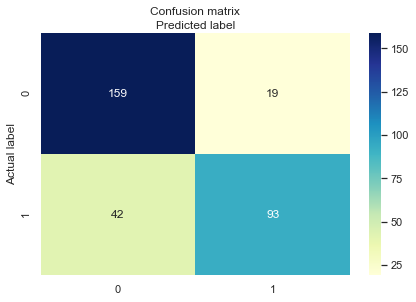

In [184]:
# Visualizing the Confusion Matrix 

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# creating the heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Predict the classes of the test data. Predict the class probability of the test data

In [197]:
# Compare one versus all and one versus one

# Analyze titanic data using multiple classes
   
############################################

# Make data (X) and target (y), leaving off last row
X = df2.iloc[:-1,:7]  
y = df2.iloc[:-1,7]
  
 
# Fit a model 
  
logmodel.fit(X,y)

# Get score for prediciting the last row (the one left out)
logmodel.score(df2.iloc[-1,:7].values.reshape(1,-1), df2.iloc[-1,7].reshape(-1,1) )


# Show predicted vs actual class for last row (left out row)
print( 'Predicted class %s, real class %s' % (logmodel.predict(df2.iloc[-1,:7].values.reshape(1,-1)),df2.iloc[-1,7]) )

# Show probabilities for each class (for the last row again)
print( 'Probabilities for each class from 0 to 2: %s' % logmodel.predict_proba(df2.iloc[-1,:7].values.reshape(1,-1) ) )

Predicted class [0], real class 0
Probabilities for each class from 0 to 2: [[0.84009649 0.09119056 0.06871295]]


C:\Users\BETTY KOUADIO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\BETTY KOUADIO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


# Compare one versus all and one versus one

In [198]:

from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

X, y = df2.iloc[:522,:7], df2.iloc[:522,7]
tX, ty = df2.iloc[522:,:7], df2.iloc[522:,7]

OVR = OneVsRestClassifier(logmodel).fit(X_train,y_train)
OVO = OneVsOneClassifier(logmodel).fit(X_train,y_train)

print( 'One vs rest accuracy: %.3f' % OVR.score(tX,ty) )
print( 'One vs one accuracy: %.3f' % OVO.score(tX,ty) )

C:\Users\BETTY KOUADIO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\BETTY KOUADIO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


One vs rest accuracy: 0.754
One vs one accuracy: 0.754


In [199]:
LR = LogisticRegression()
LR.fit(X,y)
print( 'One vs rest accuracy: %.3f' % LR.score(tX,ty) )

One vs rest accuracy: 0.804


C:\Users\BETTY KOUADIO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\BETTY KOUADIO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
